# Plotting in Julia

The three most popular options (as far as I know) in Julia are

- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia equivalent of `ggplot2` in R
    
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)
    - Defines an unified interface for plotting
    - Maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more  
    - For a complete list of backends: <http://docs.juliaplots.org/latest/backends/>  
    - Mapping of attributes to backends: <http://docs.juliaplots.org/latest/supported/>  
    - First runs can be slow. GR backend seems fastest and most stable.

In [ ]:
using Pkg
Pkg.activate("../..")
Pkg.status()

## Gadfly.jl

To demonstrate Gadfly, we will go through an example and compare it to ggplot2. 

┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/changtaeyeong/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: `summarise()` has grouped output by 'supp'. You can override using the `.groups` argument.
└ @ RCall /Users/changtaeyeong/.julia/packages/RCall/iMDW2/src/io.jl:160


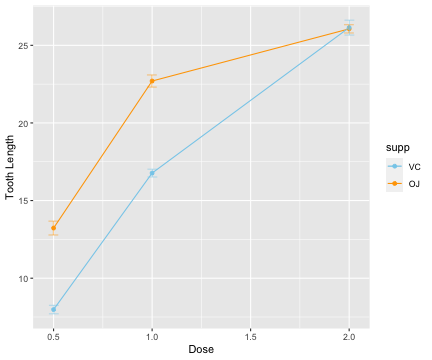

RObject{VecSxp}


In [1]:
using RCall

R"""
library(ggplot2)
library(dplyr)

df <- ToothGrowth %>%
  group_by(supp, dose) %>%
  summarise(se = sd(len) / n(), len = mean(len), n = n())

ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5,
  position = position_dodge(0.005)) +  
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length") 
"""

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1342
┌ Warning: Module DataAPI with build ID 203131114957503 is missing from the cache.
│ This may mean DataAPI [9a962f9c-6df0-11e9-0e5d-c546b8b5ee8a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004].
└ @ Base loading.jl:1047
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1342
┌ Warning: Module StatsBase with build ID 203135615949368 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing Distributions [31c24e10-a181-5473-b8eb-7969acd0382f].
└ @ Base loading.jl:1047
┌ Info: Precompiling Coupled

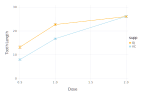

In [3]:
@rget df # retrieve dataframe from R to Julia workspace
using Gadfly
df[!, :ymin] = df[!, :len] - df[!, :se]
df[!, :ymax] = df[!, :len] + df[!, :se]
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
    Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Geom.line, Geom.errorbar, ymin = :ymin, ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

Both offer more customized options

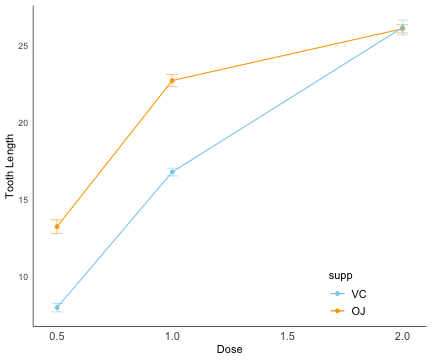

RObject{VecSxp}


In [4]:
R"""
ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5, 
    position = position_dodge(0.005)) + 
    theme(legend.position = c(0.8,0.1), 
    legend.key = element_blank(), 
    axis.text.x = element_text(angle = 0, size = 11), 
    axis.ticks = element_blank(), 
    panel.grid.major = element_blank(), 
    legend.text=element_text(size = 11),
    panel.border = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), 
    axis.line = element_line(color = 'black',size = 0.3), 
  plot.title = element_text(hjust = 0.5)) + 
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length")
"""

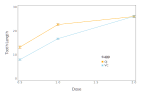

In [5]:
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
    Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Theme(panel_fill = nothing, highlight_width = 0mm, point_size = 0.5mm,
    key_position = :inside, 
    grid_line_width = 0mm, panel_stroke = colorant"black"),
    Geom.line, Geom.errorbar, ymin = :ymin, ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

## Plots.jl

We demonstrate Plots.jl below:

In [13]:
using Plots, Random

Random.seed!(123) # set seed
x = cumsum(randn(50, 2), dims=1);

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/changtaeyeong/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       hb1e8313_2         398 KB
    cycler-0.10.0              |   py39hecd8cb5_0          16 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.10.4            |       ha233b18_0         564 KB
    jpeg-9b                    |       he5867d9_2         201 KB
    kiwisolver-1.3.1           |   py39h23ab428_0          53 KB
    lcms2-2.12                 |       hf1fd2bf_0         284 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    libtiff-4.2.0              |       h87d7836_0         462 KB
    libwebp-base-1.2.0         |       h9ed2024_0         389 KB
    lz4-c-1.9.3                |       h

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/changtaeyeong/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/changtaeyeong/.julia/packages/Conda/sNGum/src/Conda.jl:128


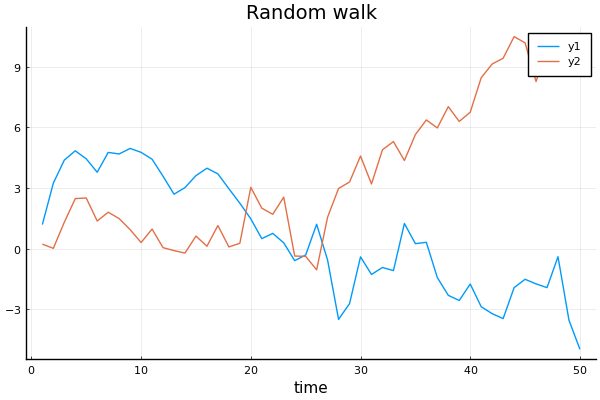

In [17]:
pyplot()  # set the backend to PyPlot
Plots.plot(x, title="Random walk", xlab="time")

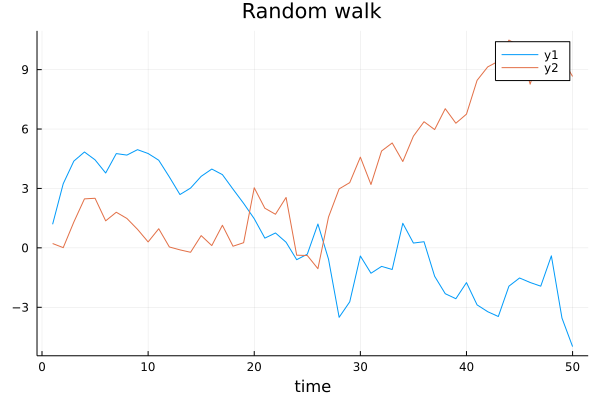

In [12]:
gr()   # change backend to GR
Plots.plot(x, title="Random walk", xlab="time")

In [20]:
gr()
@gif for i in 1:20
    Plots.plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end;

┌ Info: Saved animation to 
│   fn = /Users/changtaeyeong/Desktop/Adv_Sta_Computing/tmp.gif
└ @ Plots /Users/changtaeyeong/.julia/packages/Plots/Di0Qb/src/animation.jl:114


<img src="./tmp.gif" />

In [21]:
plotlyjs()  # change backend to PlotlyJS
Plots.plot(x, title="Random walk", xlab="time")

## Acknowledgment

This lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Winter Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.